In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
df=pd.read_csv('0-3 DATASET.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [3]:
X = df[df.columns[1:18]]
y = df[df.columns[18]]

In [4]:
y

0        No
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
1049     No
1050    Yes
1051    Yes
1052     No
1053    Yes
Name: Class/ASD Traits , Length: 1054, dtype: object

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Toddlers age in months')

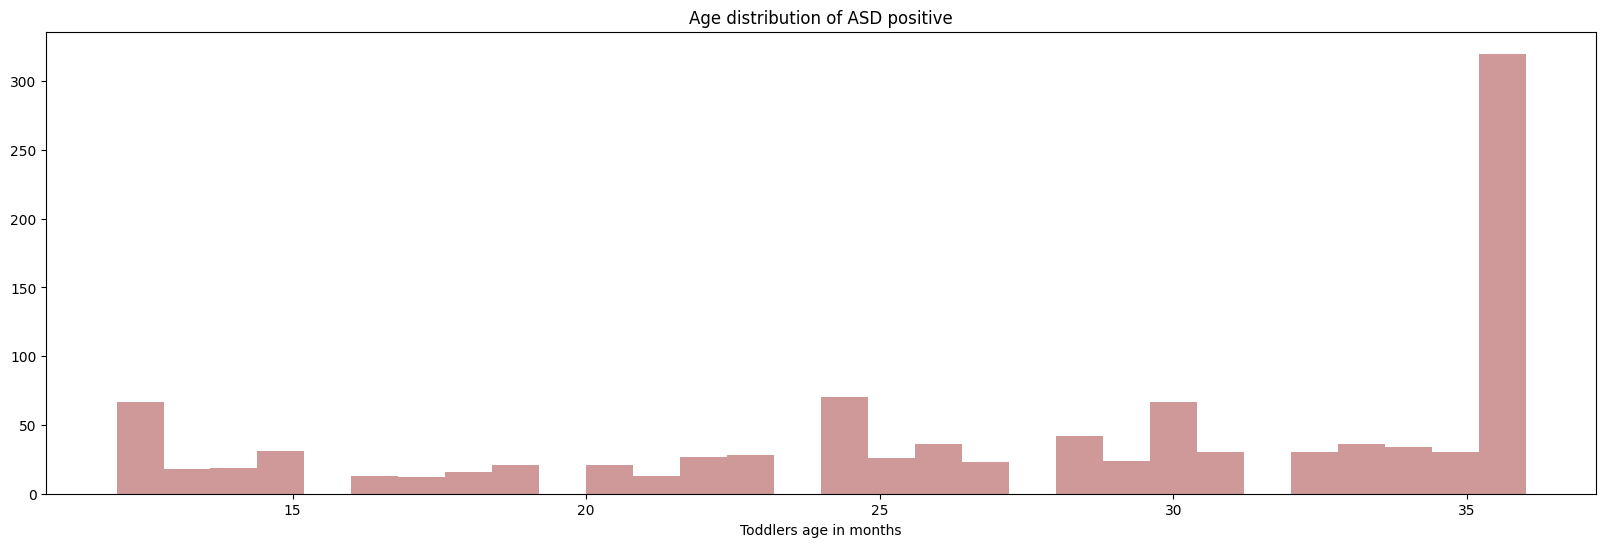

In [5]:
plt.figure(figsize=(20,6))
plt.title('Age distribution of ASD positive')
sns.distplot(df['Age_Mons'],kde=False,bins=30,color='darkred')
plt.xlabel('Toddlers age in months')


Text(0.5, 0, 'Jaundice while birth')

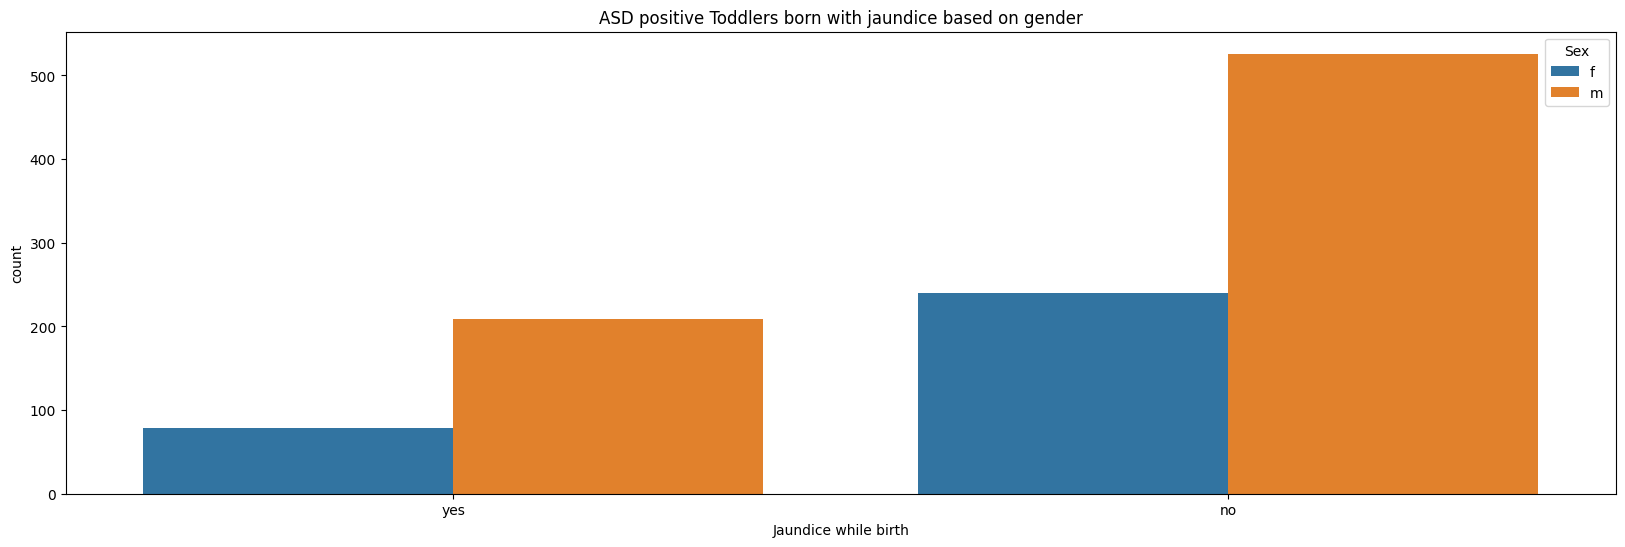

In [6]:
plt.figure(figsize=(20,6))
sns.countplot(x='Jaundice',data=df,hue='Sex')
plt.title('ASD positive Toddlers born with jaundice based on gender')
plt.xlabel('Jaundice while birth')

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


Text(0.5, 0, 'Toddlers age in months')

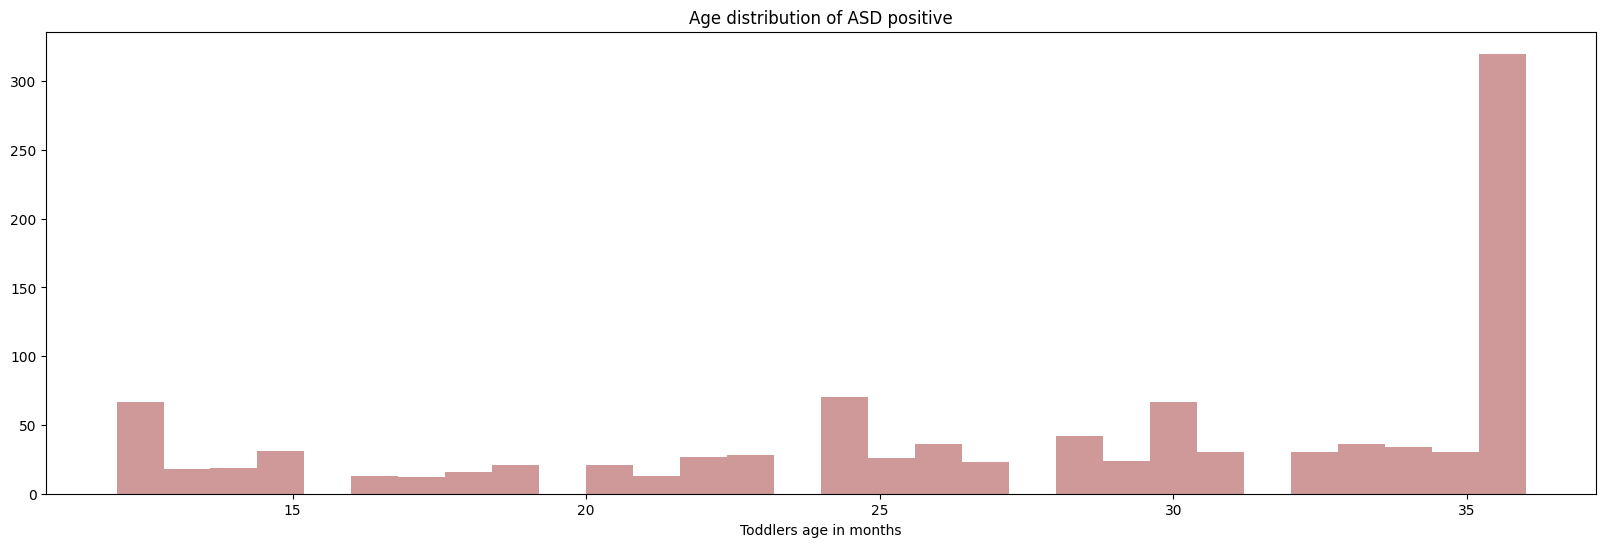

In [7]:
plt.figure(figsize=(20,6))
sns.distplot(df['Age_Mons'],kde=False,bins=30,color='darkred')
plt.title('Age distribution of ASD positive')
plt.xlabel('Toddlers age in months')


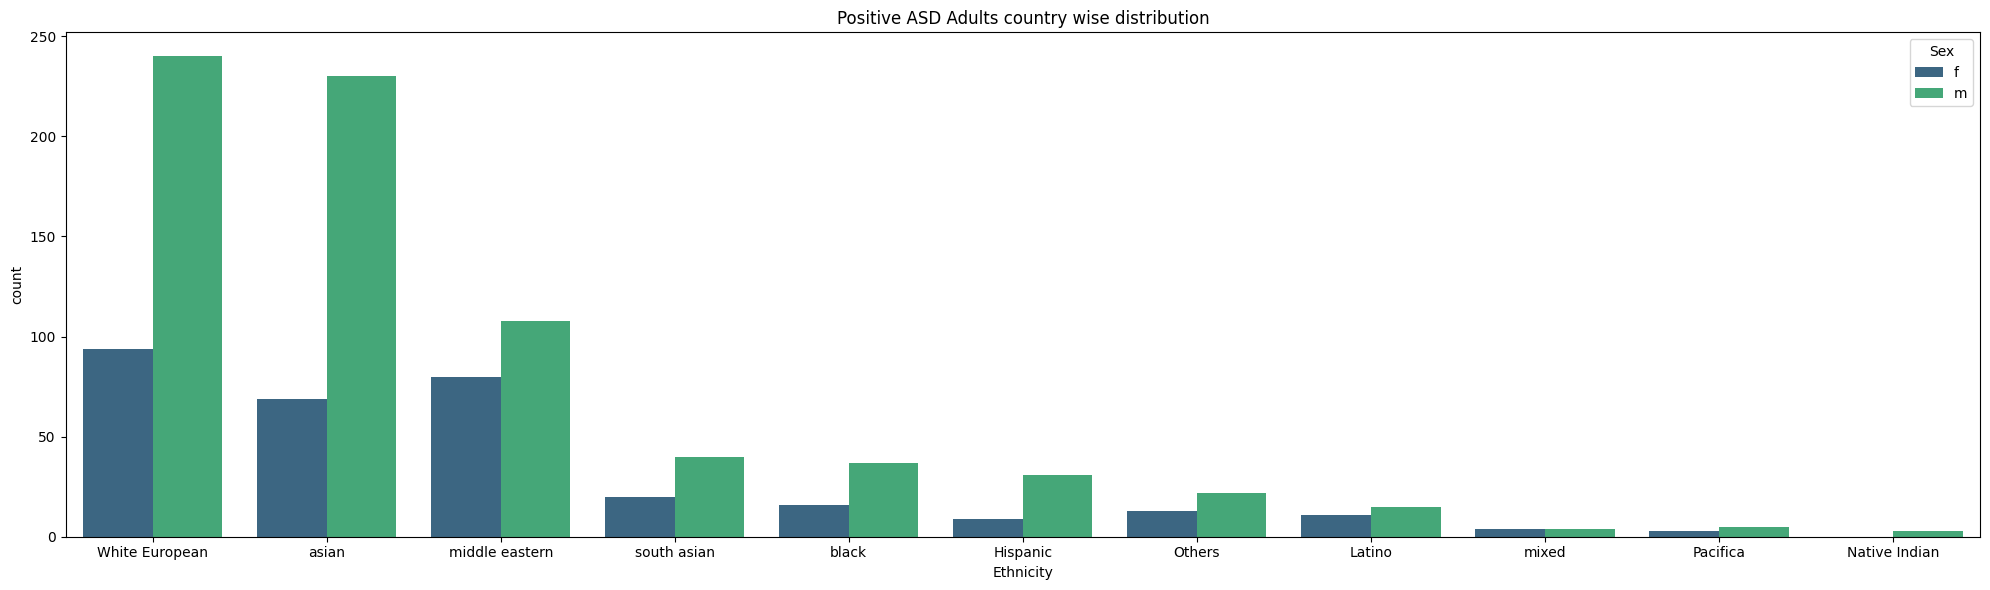

In [8]:
plt.figure(figsize=(20,6))
sns.countplot(x='Ethnicity',data=df,order= df['Ethnicity'].value_counts().index[:15],hue='Sex',palette='viridis')
plt.title('Positive ASD Adults country wise distribution')
plt.xlabel('Ethnicity')
plt.tight_layout()

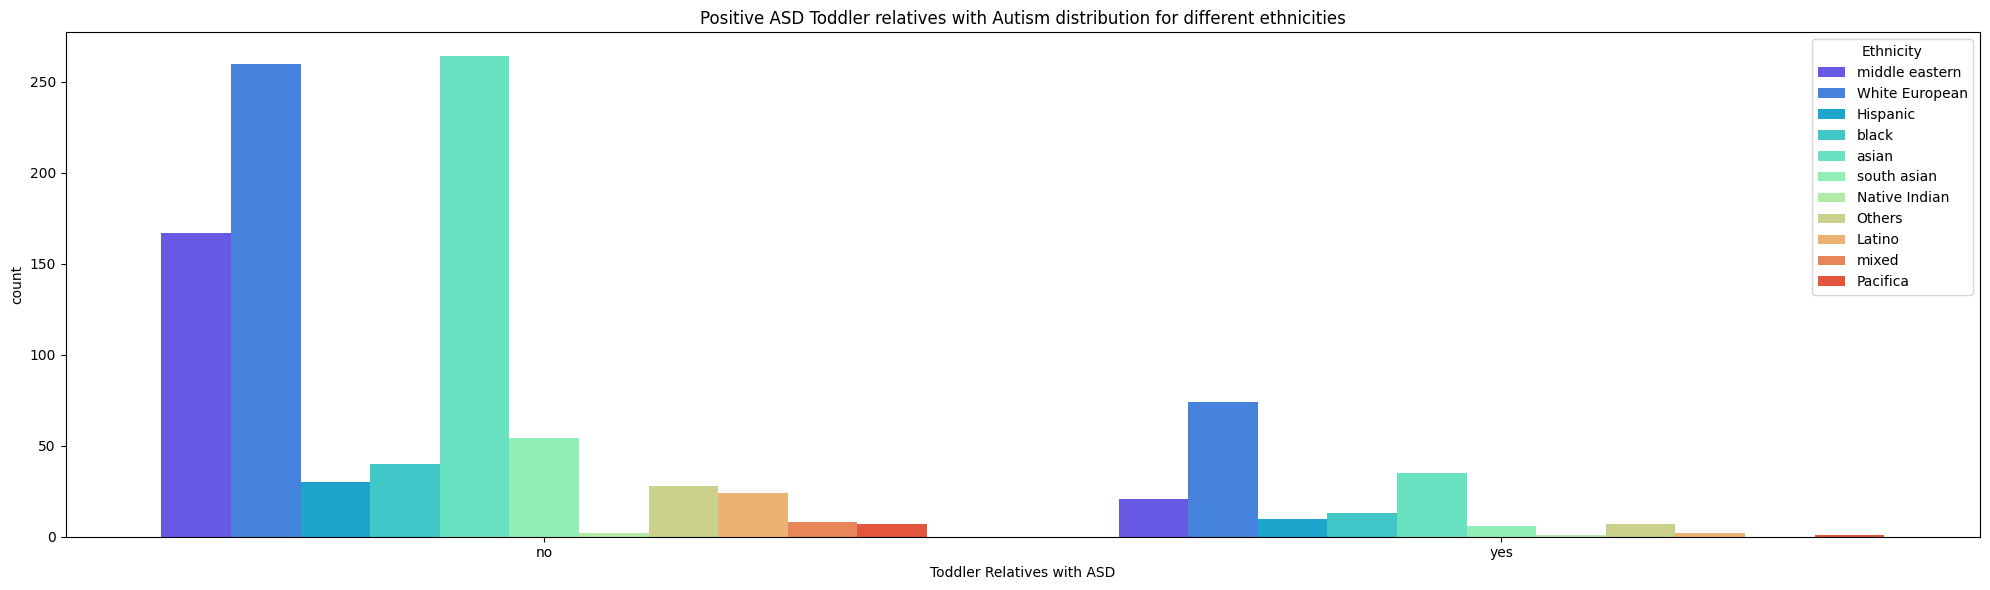

In [9]:
#Lets visualize the distribution of autism in family within different ethnicity
plt.figure(figsize=(20,6))
sns.countplot(x='Family_mem_with_ASD',data=df,hue='Ethnicity',palette='rainbow')
plt.title('Positive ASD Toddler relatives with Autism distribution for different ethnicities')
plt.xlabel('Toddler Relatives with ASD')
plt.tight_layout()

In [10]:
within24_36= pd.get_dummies(df['Age_Mons']>24,drop_first=True)
within0_12 = pd.get_dummies(df['Age_Mons']<13,drop_first=True)
male=pd.get_dummies(df['Sex'],drop_first=True)

ethnics=pd.get_dummies(df['Ethnicity'],drop_first=True)
jaundice=pd.get_dummies(df['Jaundice'],drop_first=True)
ASD_genes=pd.get_dummies(df['Family_mem_with_ASD'],drop_first=True)
ASD_traits=pd.get_dummies(df['Class/ASD Traits '],drop_first=True)
data= pd.concat([df[['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10']],within0_12,within24_36,male,ethnics,jaundice,ASD_genes,ASD_traits],axis=1)
data.columns=['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','within0_12','within24_36','male','Latino','Native Indian','Others','Pacifica','White European','asian','black','middle eastern','mixed','south asian','jaundice','ASD_genes','ASD_traits']
questions=df['A1']
'''data['A1']=df['A1']
data['A2']=df['A2']
data['A3']=df['A3']
data['A4']=df['A4']
data['A5']=df['A5']
data['A6']=df['A6']
data['A7']=df['A7']
data['A8']=df['A8']
data['A9']=df['A9']
data['A10']=df['A10']'''


data.head()



,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,Pacifica,White European,asian,black,middle eastern,mixed,south asian,jaundice,ASD_genes,ASD_traits
0,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,1,0,0,1,0,0
1,1,1,0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
2,1,0,0,0,0,0,1,1,0,1,...,0,0,0,0,1,0,0,1,0,1
3,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
4,1,1,0,1,1,1,1,1,1,1,...,0,1,0,0,0,0,0,0,1,1


In [11]:
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [14]:
df['Ethnicity'].unique()

array(['middle eastern', 'White European', 'Hispanic', 'black', 'asian',
       'south asian', 'Native Indian', 'Others', 'Latino', 'mixed',
       'Pacifica'], dtype=object)

In [15]:
from sklearn.model_selection import train_test_split
X= data.iloc[:,:-1]
y= data.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

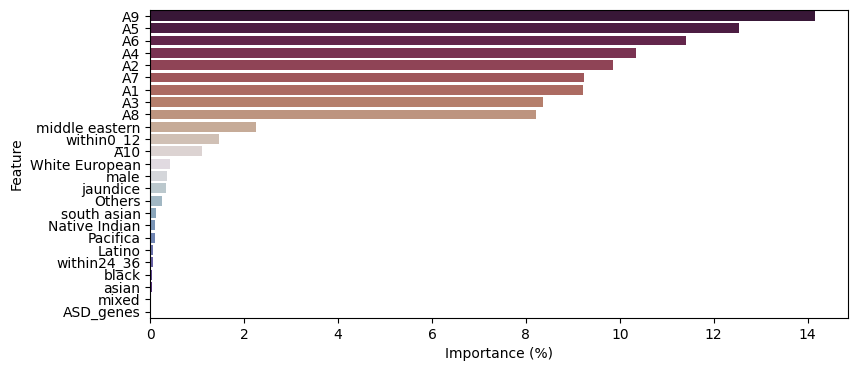

In [17]:
# X = df.drop('Class/ASD Traits ',axis=1)
# Y = df['Class/ASD Traits ']
from sklearn.feature_selection import SelectKBest, chi2
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X, y)
per = []
for i in fs.scores_:
    per.append(round(((i/sum(fs.scores_))*100),3))

features_data = pd.DataFrame({'Feature':X.columns,'Scores':fs.scores_,'Importance (%)':per}).sort_values(by=['Scores'],ascending=False)

plt.figure(figsize=(9,4))
sns.barplot( x='Importance (%)',y='Feature',orient='h',data=features_data,palette='twilight_shifted_r')
insignificant = features_data.loc[features_data['Importance (%)']<0.005]['Feature'].unique()
features_data = features_data.set_index('Feature')
features_data
plt.savefig("FeatureImportance.png")

In [ ]:
df.info()

In [ ]:
X_train

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel= LogisticRegression()
logmodel.fit(X_train,y_train)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.01,0.1,1,10,100,1000]}
grid_log = GridSearchCV(LogisticRegression(),param_grid,refit=True)
grid_log.fit(X_train,y_train)

In [ ]:
grid_log.best_estimator_
pred_log=grid_log.predict(X_test)

In [ ]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(grid_log, open(filename, 'wb'))

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred_log))
print(classification_report(y_test,pred_log))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=500)
rfc.fit(X_train,y_train)
pred_rfc= rfc.predict(X_test)
print(confusion_matrix(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)
X_scaled = pd.DataFrame(scaled_features,columns=X.columns)
X_scaled.head()
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=101)

In [ ]:
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

In [ ]:
import numpy as np


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
error_rate =[]

for i in range (1,50):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i= knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error rate vs K-value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
knn= KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,y_train)
pred_knn=knn.predict(X_test)
print(confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))